# Analysis

In [89]:
import mysql.connector as connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import wilcoxon

#### Connect Database

In [40]:
conn = connector.connect(
    host="localhost",
    user="root",
    password="pass123",
    database="gp_questionnaire"
)

cursor = conn.cursor()

In [41]:
cursor.execute("SELECT reha_FA , reha_RW, reha_AE, reha_PU FROM uesscores")
reha_items = cursor.fetchall()

rehaFA, rehaRW, rehaAE, rehaPU = [], [], [], []
for row in reha_items:
    rehaFA.append(row[0])
    rehaRW.append(row[1])
    rehaAE.append(row[2])
    rehaPU.append(row[3])

print(rehaFA)
print(rehaRW)
print(rehaAE)
print(rehaPU)

[4.571428571428571, 3.857142857142857, 2.142857142857143, 2.571428571428572, 3.142857142857143, 1.714285714285714, 4.0, 3.285714285714286, 2.714285714285714, 2.714285714285714, 3.0, 4.285714285714286, 3.714285714285714, 4.142857142857143, 3.285714285714286, 1.571428571428571, 3.428571428571428, 3.0, 2.428571428571428]
[4.7, 3.9, 3.2, 3.3, 3.8, 1.8, 3.9, 4.5, 3.7, 2.7, 2.8, 4.4, 3.9, 4.1, 4.2, 1.5, 4.1, 4.1, 3.3]
[5.0, 4.0, 3.8, 4.6, 4.0, 1.4, 4.2, 4.8, 3.8, 3.4, 2.2, 4.4, 3.4, 4.0, 4.4, 2.0, 4.2, 4.0, 3.2]
[4.0, 3.75, 3.75, 2.5, 3.75, 3.75, 4.25, 3.0, 3.375, 3.375, 3.0, 3.25, 4.0, 4.0, 4.125, 3.125, 3.125, 4.0, 4.25]


In [42]:
cursor.execute("SELECT VR_FA , VR_RW, VR_AE, VR_PU FROM uesscores")
vr_items = cursor.fetchall()

vrFA, vrRW, vrAE, vrPU = [], [], [], []
for row in vr_items:
    vrFA.append(row[0])
    vrRW.append(row[1])
    vrAE.append(row[2])
    vrPU.append(row[3])

print(vrFA)
print(vrRW)
print(vrAE)
print(vrPU)

[5.0, 4.428571428571429, 3.857142857142857, 4.857142857142857, 4.857142857142857, 5.0, 4.0, 4.285714285714286, 3.571428571428572, 4.285714285714286, 4.285714285714286, 5.0, 4.714285714285714, 5.0, 4.0, 3.571428571428572, 4.857142857142857, 3.714285714285714, 4.428571428571429]
[5.0, 4.4, 4.5, 4.3, 4.6, 5.0, 4.3, 4.9, 3.9, 4.5, 4.1, 4.9, 4.9, 4.8, 4.4, 2.9, 4.3, 5.0, 4.3]
[5.0, 4.6, 4.2, 5.0, 4.6, 4.4, 4.0, 4.8, 4.2, 4.2, 3.6, 5.0, 4.8, 4.8, 4.6, 2.8, 4.4, 4.8, 4.8]
[4.125, 3.5, 4.125, 3.375, 4.25, 4.0, 3.5, 2.75, 3.875, 4.0, 3.375, 4.375, 3.375, 4.0, 3.5, 2.75, 2.875, 4.25, 4.125]


In [43]:
rehaFA_mean = sum(rehaFA) / len(rehaFA)
rehaRW_mean = sum(rehaRW) / len(rehaRW)
rehaAE_mean = sum(rehaAE) / len(rehaAE)
rehaPU_mean = sum(rehaPU) / len(rehaPU)

reha_items = [rehaFA_mean, rehaRW_mean, rehaAE_mean, rehaPU_mean]

vrFA_mean = sum(vrFA) / len(vrFA)
vrRW_mean = sum(vrRW) / len(vrRW)
vrAE_mean = sum(vrAE) / len(vrAE)
vrPU_mean = sum(vrPU) / len(vrPU)

vr_items = [vrFA_mean, vrRW_mean, vrAE_mean, vrPU_mean]

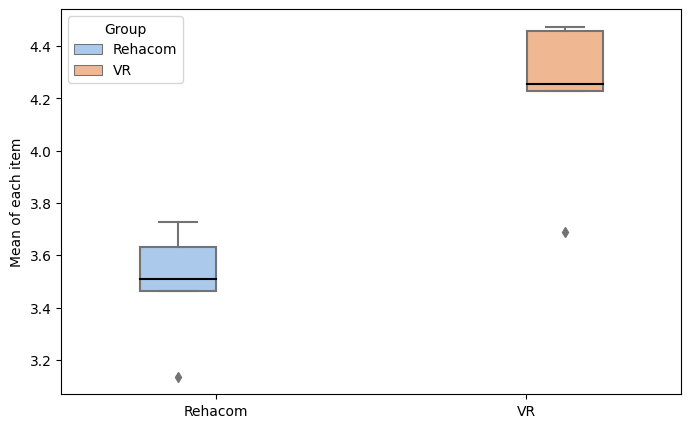

In [44]:
df = pd.DataFrame({
    'value': np.concatenate([reha_items, vr_items]),
    'group': np.repeat(['Rehacom', 'VR'], 4)
})

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette='pastel', hue='group', 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Mean of each item')
plt.legend(title='Group')
plt.show()

In [45]:
cursor.execute("SELECT reha_total FROM uesscores")
reha_total = cursor.fetchall()
print(reha_total)

reha_total = [item[0] for item in reha_total]
print(reha_total)
reha_mean = sum(reha_total) / len(reha_total)

# reha_mean

[(18.27142857142857,), (15.50714285714286,), (12.89285714285714,), (12.97142857142857,), (14.69285714285714,), (8.664285714285713,), (16.35,), (15.58571428571429,), (13.58928571428572,), (12.18928571428572,), (11.0,), (16.33571428571429,), (15.01428571428571,), (16.24285714285714,), (16.01071428571429,), (8.196428571428571,), (14.85357142857143,), (15.1,), (13.17857142857143,)]
[18.27142857142857, 15.50714285714286, 12.89285714285714, 12.97142857142857, 14.69285714285714, 8.664285714285713, 16.35, 15.58571428571429, 13.58928571428572, 12.18928571428572, 11.0, 16.33571428571429, 15.01428571428571, 16.24285714285714, 16.01071428571429, 8.196428571428571, 14.85357142857143, 15.1, 13.17857142857143]


In [46]:
cursor.execute("SELECT VR_total FROM uesscores")
VR_total = cursor.fetchall()

VR_total = [item[0] for item in VR_total]
vr_mean = sum(VR_total) / len(VR_total)

VR_total[0]

19.125

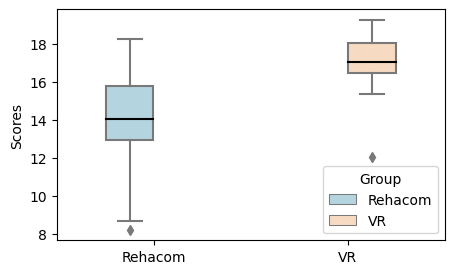

In [75]:

df = pd.DataFrame({
    'value': np.concatenate([reha_total, VR_total]),
    'group': np.repeat(['Rehacom', 'VR'], len(reha_total))
})

palette = {
    'VR': 'peachpuff',
    'Rehacom': 'lightblue'
}

plt.figure(figsize=(5, 3))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette=palette, hue='group', 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Scores')
plt.legend(title='Group')

plt.show()

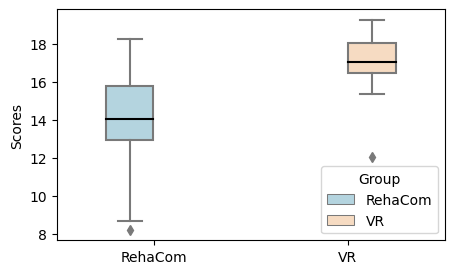

In [76]:
df = pd.DataFrame({
    'value': np.concatenate([reha_total, VR_total]),
    'group': np.repeat(['RehaCom', 'VR'], len(reha_total))
})
palette = {
    'VR': 'peachpuff',
    'RehaCom': 'lightblue'
}

plt.figure(figsize=(5, 3))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette=palette, hue='group',  
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Scores')
plt.legend(title='Group')

plt.show()

In [48]:
reha_quartiles = df[df['group'] == 'Rehacom']['value'].describe()[['25%', '75%']]
vr_quartiles = df[df['group'] == 'VR']['value'].describe()[['25%', '75%']]

# print(f"Rehacom Q1: {reha_quartiles['25%']}, Q3: {reha_quartiles['75%']}")
print (reha_quartiles['75%'] - reha_quartiles['25%'])
# print(f"VR Q1: {vr_quartiles['25%']}, Q3: {vr_quartiles['75%']}")
print (vr_quartiles['75%'] - vr_quartiles['25%'])


2.866071428571436
1.5821428571428555


In [77]:
t_statistic, p_value = stats.ttest_rel(reha_total, VR_total)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -5.8315332495757675
P-value: 1.5942466853259868e-05


In [51]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'pu';")
pudimension = cursor.fetchall()
# print(pudimension)

reha_pu_items = [[item[4] for item in pudimension if item[2] == value] for value in range(7, 15)]
vr_pu_items = [[item[5] for item in pudimension if item[2] == value] for value in range(7, 15)]

# print(reha_fa_items)
# print(vr_pu_items)
print(len(reha_pu_items) )

8


In [50]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'fa';")
fadimension = cursor.fetchall()

reha_fa_items = [[item[4] for item in fadimension if item[2] == value] for value in range(0, 7)]
vr_fa_items = [[item[5] for item in fadimension if item[2] == value] for value in range(0, 7)]

# print(reha_fa_items)
# print(vr_fa_items)
print(len(reha_fa_items))

7


In [52]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'ae';")
aedimension = cursor.fetchall()

reha_ae_items = [[item[4] for item in aedimension if item[2] == value] for value in range(15, 20)]
vr_ae_items = [[item[5] for item in aedimension if item[2] == value] for value in range(15, 20)]

# print(reha_ae_items)
# print(vr_ae_items)
print(len(reha_ae_items) * len(reha_ae_items[0]))

95


In [53]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'RW';")
rwdimension = cursor.fetchall()
# print(rwdimension)

reha_rw_items = [[item[4] for item in rwdimension if item[2] == value] for value in range(20, 30)]
vr_rw_items = [[item[5] for item in rwdimension if item[2] == value] for value in range(20, 30)]

# print(reha_rw_items)
# print(vr_rw_items)
# print(len(reha_rw_items) * len(reha_rw_items[0]))

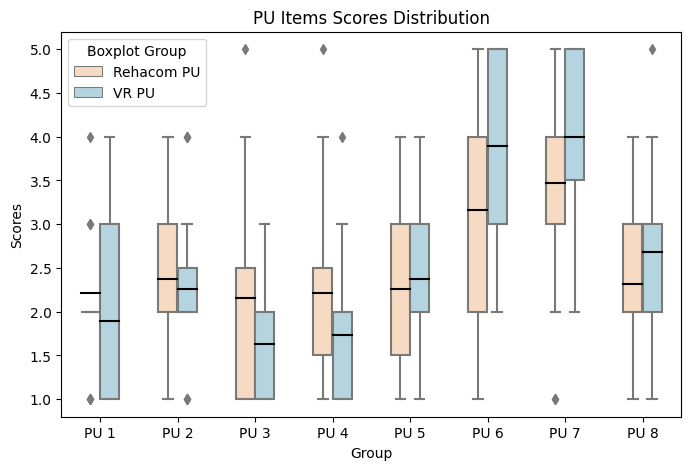

In [54]:
# PU Questions
df = pd.DataFrame({
    'value': np.concatenate([reha_pu_items[0] , vr_pu_items[0] 
                            , reha_pu_items[1] , vr_pu_items[1]
                            , reha_pu_items[2] , vr_pu_items[2] 
                            , reha_pu_items[3] , vr_pu_items[3]
                            , reha_pu_items[4] , vr_pu_items[4] 
                            , reha_pu_items[5] , vr_pu_items[5]
                            , reha_pu_items[6] , vr_pu_items[6]
                            , reha_pu_items[7] , vr_pu_items[7]]),
    'boxplot': (['Rehacom PU'] * len(reha_pu_items[0]) + ['VR PU'] * len(vr_pu_items[0]) +
                ['Rehacom PU'] * len(reha_pu_items[1]) + ['VR PU'] * len(vr_pu_items[1]) +
                ['Rehacom PU'] * len(reha_pu_items[2]) + ['VR PU'] * len(vr_pu_items[2]) +
                ['Rehacom PU'] * len(reha_pu_items[3]) + ['VR PU'] * len(vr_pu_items[3]) +
                ['Rehacom PU'] * len(reha_pu_items[4]) + ['VR PU'] * len(vr_pu_items[4]) +
                ['Rehacom PU'] * len(reha_pu_items[5]) + ['VR PU'] * len(vr_pu_items[5]) +
                ['Rehacom PU'] * len(reha_pu_items[6]) + ['VR PU'] * len(vr_pu_items[6]) +
                ['Rehacom PU'] * len(reha_pu_items[7]) + ['VR PU'] * len(vr_pu_items[7])),
    'group': np.repeat(['PU 1', 'PU 2', 'PU 3', 'PU 4', 'PU 5', 'PU 6', 'PU 7', 'PU 8'], 2 * len(reha_pu_items[0]))
})

palette = {
    'VR PU': 'lightblue',
    'Rehacom PU': 'peachpuff'
}

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', hue='boxplot', data=df, width=0.5, palette=palette,
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},
            medianprops={'visible': False})

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('PU Items Scores Distribution')
plt.legend(title='Boxplot Group')

plt.show()

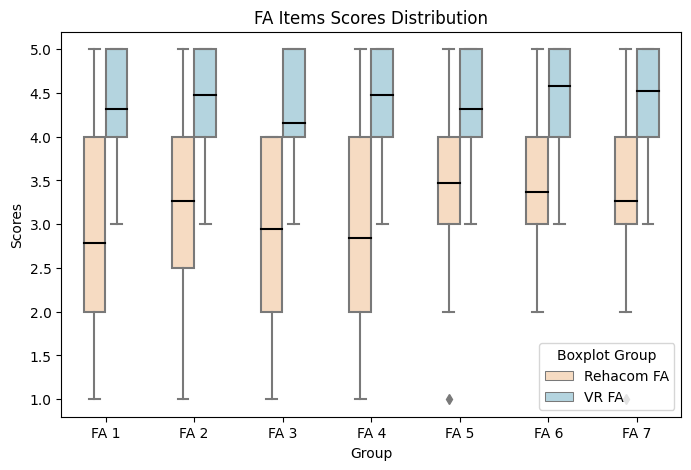

In [55]:
# FA Questions
df = pd.DataFrame({
    'value': np.concatenate([reha_fa_items[0] , vr_fa_items[0] 
                            , reha_fa_items[1] , vr_fa_items[1]
                            , reha_fa_items[2] , vr_fa_items[2] 
                            , reha_fa_items[3] , vr_fa_items[3]
                            , reha_fa_items[4] , vr_fa_items[4] 
                            , reha_fa_items[5] , vr_fa_items[5]
                            , reha_fa_items[6] , vr_fa_items[6]]),
    'boxplot': (['Rehacom FA'] * len(reha_fa_items[0]) + ['VR FA'] * len(vr_fa_items[0]) +
                ['Rehacom FA'] * len(reha_fa_items[1]) + ['VR FA'] * len(vr_fa_items[1]) +
                ['Rehacom FA'] * len(reha_fa_items[2]) + ['VR FA'] * len(vr_fa_items[2]) +
                ['Rehacom FA'] * len(reha_fa_items[3]) + ['VR FA'] * len(vr_fa_items[3]) +
                ['Rehacom FA'] * len(reha_fa_items[4]) + ['VR FA'] * len(vr_fa_items[4]) +
                ['Rehacom FA'] * len(reha_fa_items[5]) + ['VR FA'] * len(vr_fa_items[5]) +
                ['Rehacom FA'] * len(reha_fa_items[6]) + ['VR FA'] * len(vr_fa_items[6])), 
    'group': np.repeat(['FA 1', 'FA 2', 'FA 3', 'FA 4', 'FA 5', 'FA 6', 'FA 7'], 2 * len(reha_fa_items[0]))
})



palette = {
    'VR FA': 'lightblue',
    'Rehacom FA': 'peachpuff'
}

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', hue='boxplot', data=df, width=0.5, palette=palette,
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},
            medianprops={'visible': False})

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('FA Items Scores Distribution')
plt.legend(title='Boxplot Group')


plt.show()

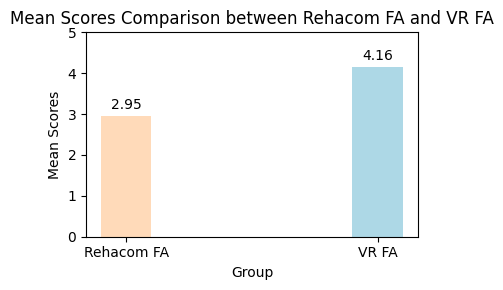

In [56]:
reha_fa4_mean = sum(reha_fa_items[2])/len(reha_fa_items[4])
vr_fa4_mean = sum(vr_fa_items[2])/len(vr_fa_items[4])

labels = ['Rehacom FA', 'VR FA']
means = [reha_fa4_mean, vr_fa4_mean]
colors = ['peachpuff', 'lightblue']

# Decrease bar width
bar_width = 0.2

# Plotting the bar plot
plt.figure(figsize=(4, 3))
bars = plt.bar(labels, means, color=colors, width=bar_width)

# Adding labels, title, and grid
plt.xlabel('Group')
plt.ylabel('Mean Scores')
plt.title('Mean Scores Comparison between Rehacom FA and VR FA')
plt.ylim(0, 5)  # Adjust ylim based on your data range
plt.grid(axis='y', linestyle='--', alpha=0.)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

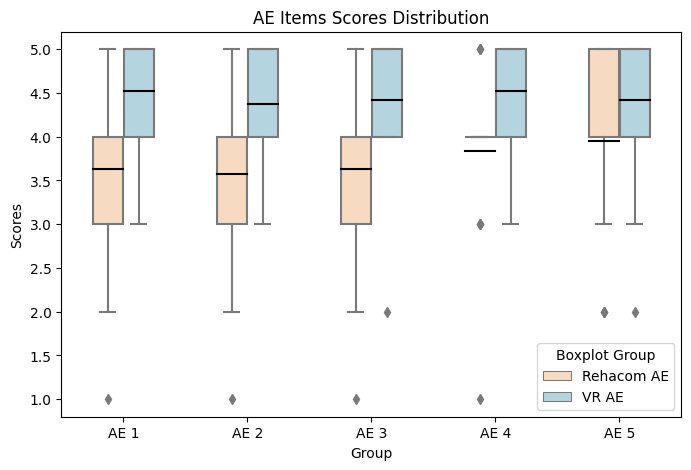

In [57]:
# AE Questions
df = pd.DataFrame({
    'value': np.concatenate([reha_ae_items[0] , vr_ae_items[0] 
                            , reha_ae_items[1] , vr_ae_items[1]
                            , reha_ae_items[2] , vr_ae_items[2] 
                            , reha_ae_items[3] , vr_ae_items[3]
                            , reha_ae_items[4] , vr_ae_items[4]]),
    'boxplot': (['Rehacom AE'] * len(reha_ae_items[0]) + ['VR AE'] * len(vr_ae_items[0]) +
                ['Rehacom AE'] * len(reha_ae_items[1]) + ['VR AE'] * len(vr_ae_items[1]) +
                ['Rehacom AE'] * len(reha_ae_items[2]) + ['VR AE'] * len(vr_ae_items[2]) +
                ['Rehacom AE'] * len(reha_ae_items[3]) + ['VR AE'] * len(vr_ae_items[3]) +
                ['Rehacom AE'] * len(reha_ae_items[4]) + ['VR AE'] * len(vr_ae_items[4])), 
    'group': np.repeat(['AE 1', 'AE 2', 'AE 3', 'AE 4', 'AE 5'], 2 * len(vr_ae_items[0]))
})



palette = {
    'VR AE': 'lightblue',
    'Rehacom AE': 'peachpuff'
}

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', hue='boxplot', data=df, width=0.5, palette=palette,
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},
            medianprops={'visible': False})

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('AE Items Scores Distribution')
plt.legend(title='Boxplot Group')

plt.show()

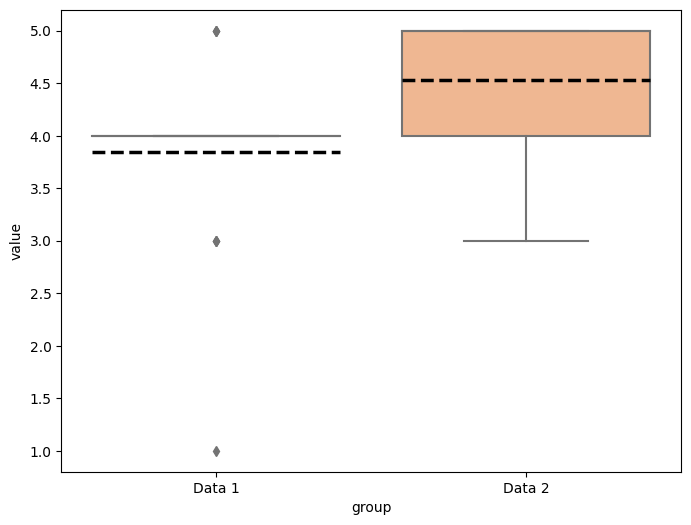

In [58]:

df = pd.DataFrame({
    'value': np.concatenate([reha_ae_items[3] , vr_ae_items[3]]),
    'group': np.repeat(['Data 1', 'Data 2'], len(reha_fa_items[0]))
})

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='value', data=df, showmeans=True, meanline=True, palette='pastel', meanprops={'color': 'black', 'linewidth': 2.5})

plt.show()

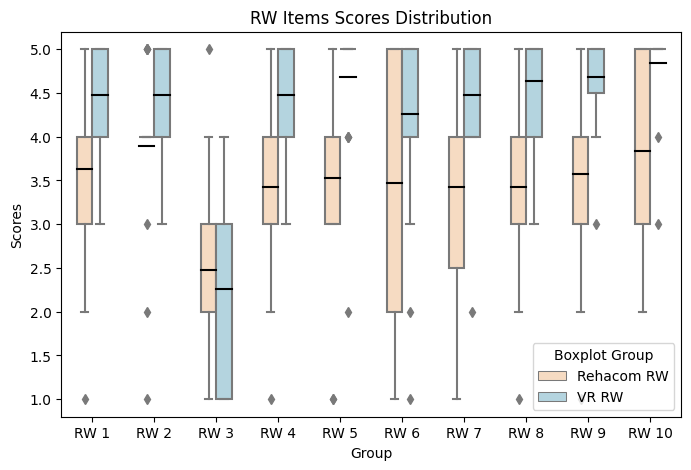

In [59]:
# RW Questions
df = pd.DataFrame({
    'value': np.concatenate([reha_rw_items[0] , vr_rw_items[0] 
                            , reha_rw_items[1] , vr_rw_items[1]
                            , reha_rw_items[2] , vr_rw_items[2] 
                            , reha_rw_items[3] , vr_rw_items[3]
                            , reha_rw_items[4] , vr_rw_items[4] 
                            , reha_rw_items[5] , vr_rw_items[5]
                            , reha_rw_items[6] , vr_rw_items[6]
                            , reha_rw_items[7] , vr_rw_items[7]
                            , reha_rw_items[8] , vr_rw_items[8]
                            , reha_rw_items[9] , vr_rw_items[9]]),
    'boxplot': (['Rehacom RW'] * len(reha_rw_items[0]) + ['VR RW'] * len(vr_rw_items[0]) +
                ['Rehacom RW'] * len(reha_rw_items[1]) + ['VR RW'] * len(vr_rw_items[1]) +
                ['Rehacom RW'] * len(reha_rw_items[2]) + ['VR RW'] * len(vr_rw_items[2]) +
                ['Rehacom RW'] * len(reha_rw_items[3]) + ['VR RW'] * len(vr_rw_items[3]) +
                ['Rehacom RW'] * len(reha_rw_items[4]) + ['VR RW'] * len(vr_rw_items[4]) +
                ['Rehacom RW'] * len(reha_rw_items[5]) + ['VR RW'] * len(vr_rw_items[5]) +
                ['Rehacom RW'] * len(reha_rw_items[6]) + ['VR RW'] * len(vr_rw_items[6]) +
                ['Rehacom RW'] * len(reha_rw_items[7]) + ['VR RW'] * len(vr_rw_items[7]) +
                ['Rehacom RW'] * len(reha_rw_items[8]) + ['VR RW'] * len(vr_rw_items[8]) +
                ['Rehacom RW'] * len(reha_rw_items[9]) + ['VR RW'] * len(vr_rw_items[9])), 
    'group': np.repeat(['RW 1', 'RW 2', 'RW 3', 'RW 4', 'RW 5', 'RW 6', 'RW 7', 'RW 8', 'RW 9', 'RW 10'], 2 * len(reha_rw_items[0]))
})


palette = {
    'VR RW': 'lightblue',
    'Rehacom RW': 'peachpuff'
}

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', hue='boxplot', data=df, width=0.5, palette=palette,
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},
            medianprops={'visible': False})

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('RW Items Scores Distribution')
plt.legend(title='Boxplot Group')


plt.show()


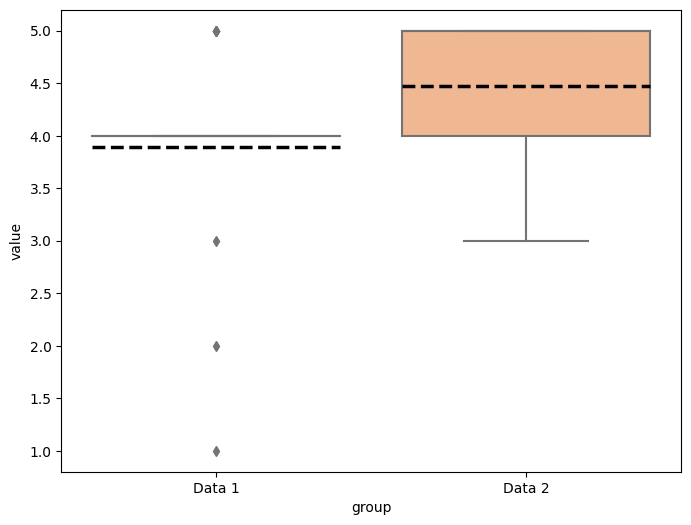

In [86]:

df = pd.DataFrame({
    'value': np.concatenate([reha_rw_items[1] , vr_rw_items[1]]),
    'group': np.repeat(['Data 1', 'Data 2'], len(reha_fa_items[0]))
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='value', data=df, showmeans=True, meanline=True, palette='pastel', meanprops={'color': 'black', 'linewidth': 2.5})

plt.show()

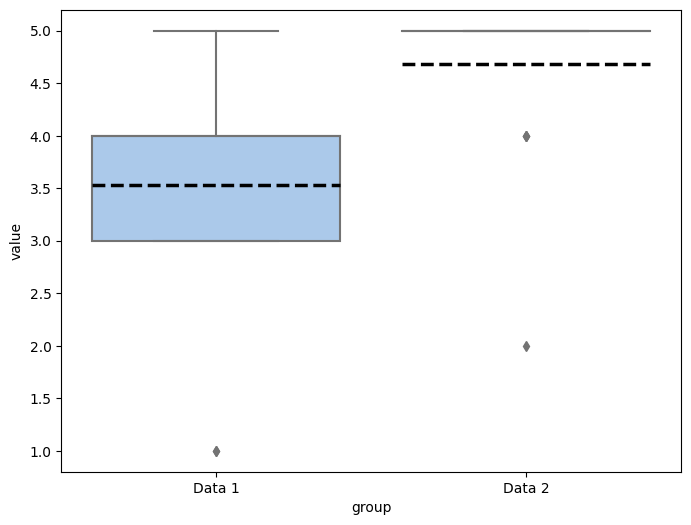

In [88]:

df = pd.DataFrame({
    'value': np.concatenate([reha_rw_items[4] , vr_rw_items[4]]),
    'group': np.repeat(['Data 1', 'Data 2'], len(reha_fa_items[0]))
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='value', data=df, showmeans=True, meanline=True, palette='pastel', meanprops={'color': 'black', 'linewidth': 2.5})

plt.show()

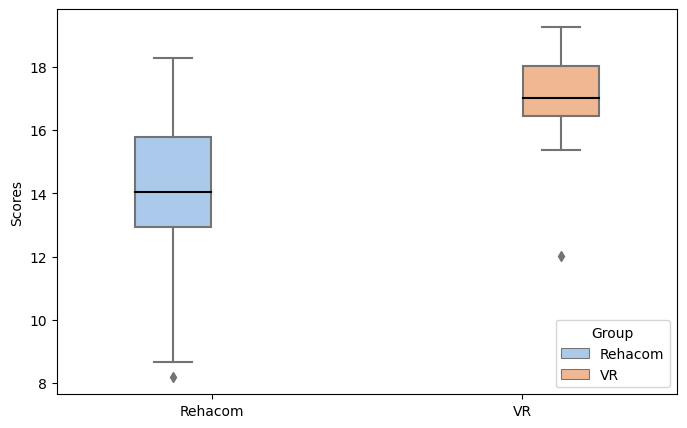

In [61]:
df = pd.DataFrame({
    'value': np.concatenate([reha_total, VR_total]),
    'group': np.repeat(['Rehacom', 'VR'], len(reha_total))
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette='pastel', hue='group', 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Scores')
plt.legend(title='Group')

plt.show()

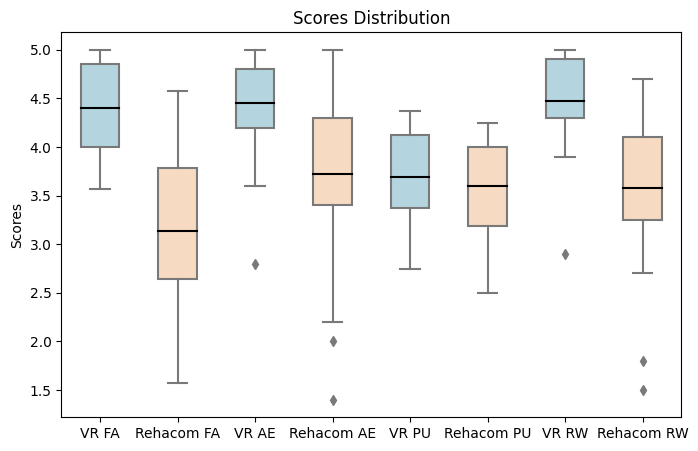

In [62]:
df = pd.DataFrame({
    'value': np.concatenate([vrFA, rehaFA, vrAE, rehaAE, vrPU, rehaPU, vrRW, rehaRW]),
    'group': np.repeat(['VR FA', 'Rehacom FA', 'VR AE', 'Rehacom AE',  'VR PU', 'Rehacom PU', 'VR RW', 'Rehacom RW'], len(reha_total))
})

palette = {
    'VR FA': 'lightblue', 'VR AE': 'lightblue', 'VR PU': 'lightblue', 'VR RW': 'lightblue',
    'Rehacom FA': 'peachpuff', 'Rehacom AE': 'peachpuff', 'Rehacom PU': 'peachpuff', 'Rehacom RW': 'peachpuff'
}

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette=palette, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Scores')
plt.title('Scores Distribution')
# plt.legend(title='Group')

plt.show()

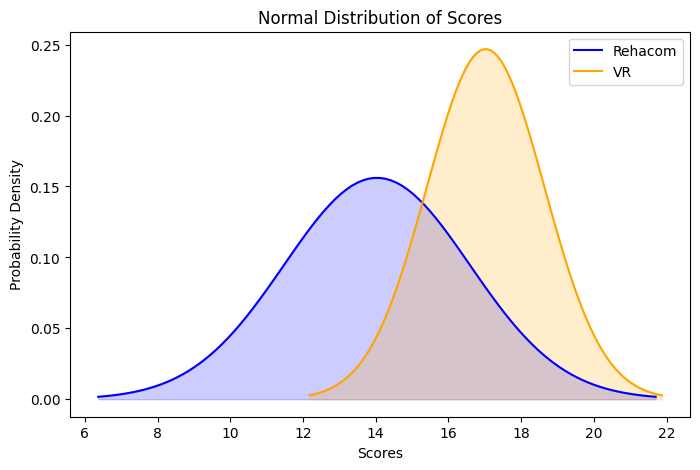

In [63]:
reha_mean, reha_std = np.mean(reha_total), np.std(reha_total)
vr_mean, vr_std = np.mean(VR_total), np.std(VR_total)

# Generate x values for the bell curve
x_reha = np.linspace(reha_mean - 3*reha_std, reha_mean + 3*reha_std, 100)
x_vr = np.linspace(vr_mean - 3*vr_std, vr_mean + 3*vr_std, 100)

# Generate y values for the bell curve
y_reha = norm.pdf(x_reha, reha_mean, reha_std)
y_vr = norm.pdf(x_vr, vr_mean, vr_std)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_reha, y_reha, label='Rehacom', color='blue')
plt.plot(x_vr, y_vr, label='VR', color='orange')
plt.fill_between(x_reha, y_reha, alpha=0.2, color='blue')
plt.fill_between(x_vr, y_vr, alpha=0.2, color='orange')

plt.xlabel('Scores')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Scores')
plt.legend()
plt.show()

In [64]:
reha_std

2.555335598712545

In [65]:
vr_std

1.6157465479206254

In [80]:
t_statistic, p_value = stats.ttest_rel(reha_total, VR_total)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -5.8315332495757675
P-value: 1.5942466853259868e-05


In [91]:
stat, p_value = wilcoxon(reha_total, VR_total)

print(f"Wilcoxon Signed-Rank Test Statistic: {stat}")
print(f"P-value: {p_value}")

Wilcoxon Signed-Rank Test Statistic: 2.0
P-value: 1.1444091796875e-05


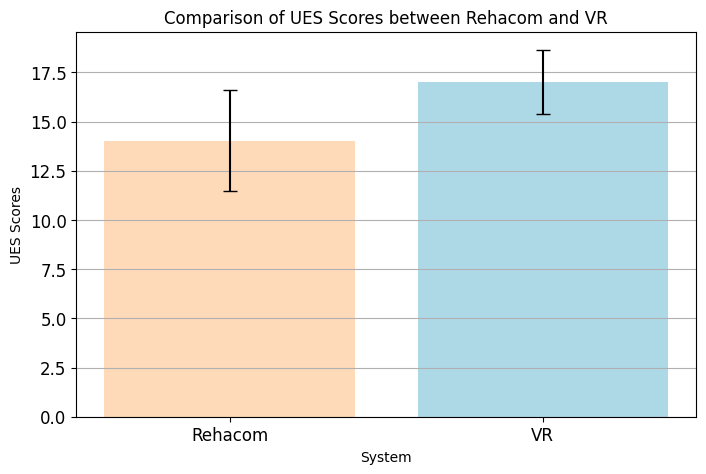

In [79]:
categories = ['Rehacom', 'VR']
means = [reha_mean, vr_mean]
stds = [reha_std, vr_std]

plt.figure(figsize=(8, 5))
plt.bar(categories, means, yerr=stds, capsize=5, color=['peachpuff', 'lightblue'])
plt.xlabel('System')
plt.ylabel('UES Scores')
plt.title('Comparison of UES Scores between Rehacom and VR')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

plt.show()

Wilcoxon Signed-Rank Test Statistic: 2.0
P-value: 1.1444091796875e-05


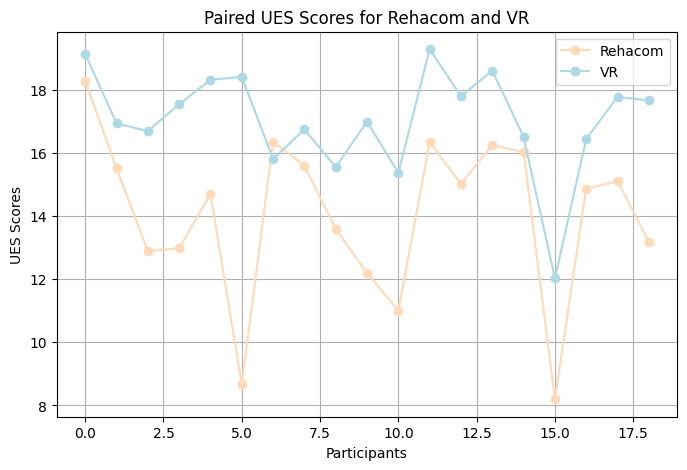

In [85]:
df = pd.DataFrame({
    'Scores': reha_total + VR_total,
    'Group': ['Rehacom'] * len(reha_total) + ['VR'] * len(VR_total)
})

plt.figure(figsize=(8, 5))
plt.plot(reha_total, 'o-', label='Rehacom', color='peachpuff')
plt.plot(VR_total, 'o-', label='VR', color='lightblue')
plt.xlabel('Participants')
plt.ylabel('UES Scores')
plt.title('Paired UES Scores for Rehacom and VR')
plt.legend()
plt.grid(True)
plt.show()